In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):

    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        # decide the number of layers
        # create an attribute for each layer and decide the type of layer
        # Input Layer (4 features) --> (n neurons) h1 --> (n neurons)  h2 --> output ( 3 classes)

        super().__init__()  # Instantiate the super class
        self.fc1 = nn.Linear(in_features,h1) # 4 features in and 8 features for the firs hidden layer out
        self.fc2 = nn.Linear(h1,h2) # 8 features from the first hidden layer in and 9 features for the next hidden layer out.
        self.out = nn.Linear(h2,out_features) # 9 features from the 2nd hidden layer in and 3 class based selection out


       
    def forward(self,x):
        x = F.relu(self.fc1(x)) # Passing the input through the weights and bias of this layer and then passing it through the activation function
        x = F.relu(self.fc2(x)) # Passing the output from the input layer to the function and then the activation function
        x = self.out(x)

        return x



In [4]:
torch.manual_seed(32)
model = Model()

## Reading and visualizing the data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('./PYTORCH_NOTEBOOKS/Data/iris.csv')

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


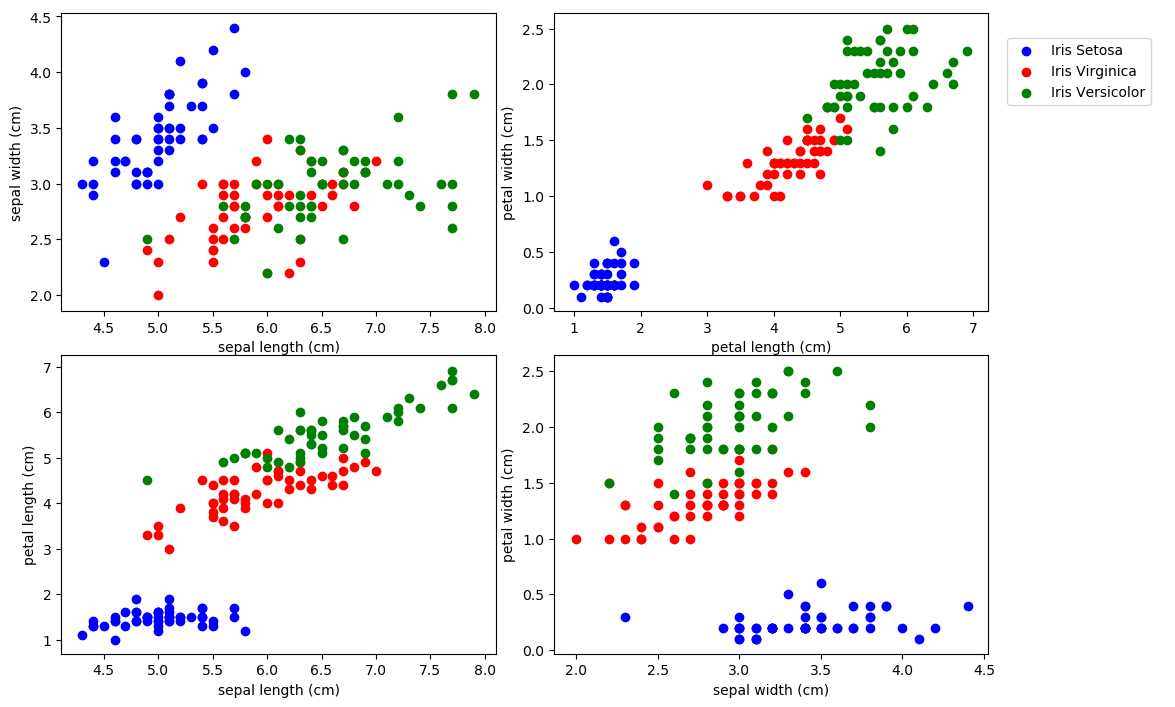

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b','r','g']
labels = ['Iris Setosa','Iris Virginica','Iris Versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x],df[df['target']==j][y],color=colors[j])
        ax.set(xlabel=x,ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [14]:
# performing a train test split
X = df.drop('target',axis=1)
y = df['target']

In [19]:
X = X.values
y = y.values

In [22]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [27]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [29]:
# Don't need to one-hot encode for cross entropy loss

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [32]:
model.parameters # This is fed into the optimizer

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [35]:
# No of Epochs 
# Advice start small.


epochs = 100
losses = []

for i in range(epochs):

    y_pred = model.forward(X_train)

    # Calculate the loss

    loss = criterion(y_pred,y_train)

    losses.append(loss)

    if i % 10 == 0:
        print(f'Epoch {i} and loss is {loss}')

    # Back Propagation
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()



Epoch 0 and loss is 1.1507115364074707
Epoch 10 and loss is 0.9377316832542419
Epoch 20 and loss is 0.7798274755477905
Epoch 30 and loss is 0.6099672317504883
Epoch 40 and loss is 0.40083548426628113
Epoch 50 and loss is 0.25436991453170776
Epoch 60 and loss is 0.15052440762519836
Epoch 70 and loss is 0.100861556828022
Epoch 80 and loss is 0.08127662539482117
Epoch 90 and loss is 0.07230935245752335


Text(0.5, 0, 'EPOCH')

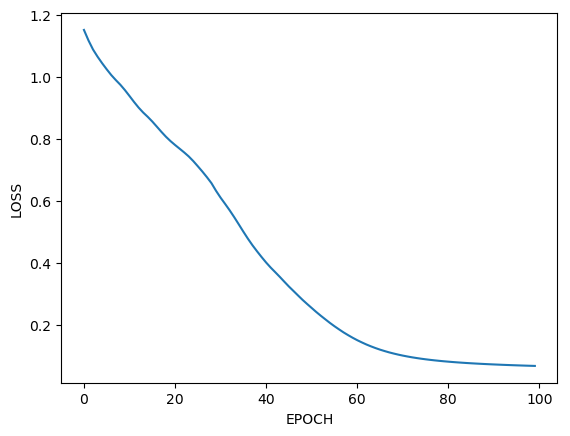

In [36]:
plt.plot(range(epochs),losses)
plt.ylabel("LOSS")
plt.xlabel("EPOCH")

## Validate the Model and save the model

In [37]:
with torch.no_grad():  # Deactivates the back propagation ( basically reduces memory and speeds up computation time)

    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)


In [38]:
print(loss)

tensor(0.0581)


In [47]:
correct = 0

with torch.no_grad():

    for i,data in enumerate(X_test):

        y_val = model.forward(data)

        # print(f'{i+1}.)  {str(y_val)}  {y_test[i]} ') # Gives out the result from the Cross Entropy Function.
        
        print(f'{i+1}.)  {str(y_val.argmax().item())}  {y_test[i]} ') # Gives out the prediction class and the correct answer

    
        if y_val.argmax().item() == y_test[i]:
            correct += 1
    
print(f'We got {correct} correct')

1.)  1  1 
2.)  1  1 
3.)  0  0 
4.)  1  1 
5.)  2  2 
6.)  2  2 
7.)  0  0 
8.)  0  0 
9.)  2  2 
10.)  2  2 
11.)  2  2 
12.)  0  0 
13.)  2  2 
14.)  1  1 
15.)  2  2 
16.)  1  1 
17.)  2  2 
18.)  0  0 
19.)  1  1 
20.)  2  2 
21.)  0  0 
22.)  0  0 
23.)  2  2 
24.)  0  0 
25.)  2  2 
26.)  2  2 
27.)  1  1 
28.)  1  1 
29.)  2  2 
30.)  2  2 
We got 30 correct


In [59]:
# Saving the trained model

torch.save(model.state_dict(),'my_iris_model.pt') # Learned parameters of the model

In [60]:
new_model = Model() # Random weights and biases
new_model.load_state_dict(torch.load('my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [61]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [62]:
# To save model with it's class and parameters

torch.save(model,'iris_full_model.pkl')

c:\Users\ila66\anaconda3\envs\pytorchenv\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [64]:
# Using on new unseen data 
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])


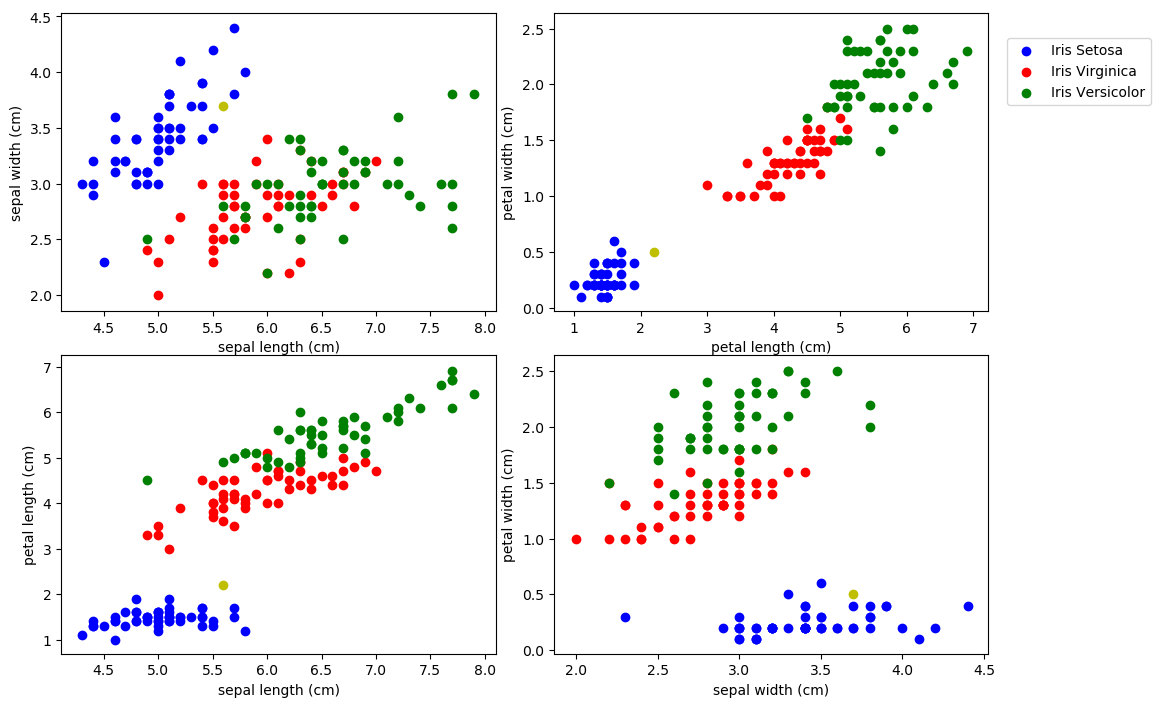

In [65]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b','r','g']
labels = ['Iris Setosa','Iris Virginica','Iris Versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x],df[df['target']==j][y],color=colors[j])
        ax.set(xlabel=x,ylabel=y)
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]],color='y')
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [69]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax().item())

tensor([  5.9520,   1.5591, -10.0041])
0
